In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch is an open source machine learning library used
# for developing and training neural network based deep learning models.
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [26]:
#Generating 500 random integers from 0 to 1
x = np.random.rand(500)
#Call an array from 0 to 4
x[:5]

array([0.87734655, 0.254345  , 0.61930197, 0.25994717, 0.30240562])

In [27]:
#Noise has 500 random numbers over standard normal distribution and divides it by 4
noise = np.random.randn(500)/4
#Call noise array from 0 to 4
noise[:5]

array([-0.10185869, -0.2152819 , -0.0069083 , -0.1095075 , -0.05430114])

In [28]:
m = 2 # slope or weight
c = 3 # coffecient or bias

In [29]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

# so m = 2, and c = 3
# x is an array of 500 numbers
# noise is also an array of 500 numbers
# and we see the index of 0 to 4 printed below

array([4.65283441, 3.29340811, 4.23169564, 3.41038683, 3.55051011])

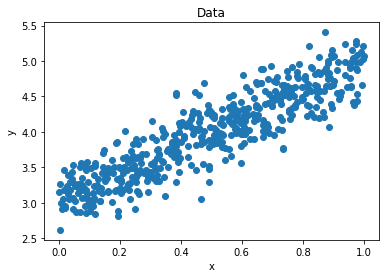

In [30]:
# we took the 500 values of x and y variable
# and plotted it on a chart
# lableled to x axis as x
# labeled the y axis as y
#Visualise Our data

plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [31]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

# tensor is similar to a numpy array
# and has a data type of torch.float64
# we printing the index for input and targets from 0 to 4
'''
tensor is basically the same as a numpy array:
it does not know anything about deep learning
or computational graphs or gradients,
and is just a generic n-dimensional array
to be used for arbitrary numeric computation
'''

tensor([0.8773, 0.2543, 0.6193, 0.2599, 0.3024], dtype=torch.float64)
tensor([4.6528, 3.2934, 4.2317, 3.4104, 3.5505], dtype=torch.float64)


'\ntensor is basically the same as a numpy array:\nit does not know anything about deep learning\nor computational graphs or gradients,\nand is just a generic n-dimensional array\nto be used for arbitrary numeric computation\n'

In [32]:
# Changing the data type to float32 as our model accepts float32 data type
# Reduces memory usage
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [33]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)

# inputs.reshape(-1,1)
# reshaping the tensor, by -1 (row) and containing (1) column
'''
-1 in reshape function is used when you 
dont know or want to explicitly tell the dimension of that axis

If you have an array of shape (2,4)
then reshaping it with (-1, 1), then the array will get reshaped in such
a way that the resulting array has only 1 column and
this is only possible by having 8 rows, hence, (8,1).
'''

'\n-1 in reshape function is used when you \ndont know or want to explicitly tell the dimension of that axis\n\nIf you have an array of shape (2,4)\nthen reshaping it with (-1, 1), then the array will get reshaped in such\na way that the resulting array has only 1 column and\nthis is only possible by having 8 rows, hence, (8,1).\n'

In [34]:
print(targets[:5])

tensor([[4.6528],
        [3.2934],
        [4.2317],
        [3.4104],
        [3.5505]])


In [35]:
#x * m + c
actual_targets = torch.from_numpy(x * m + c)
actual_targets = actual_targets.type(torch.float32)
actual_targets = actual_targets.reshape(-1,1)
print(actual_targets[:5])


# forming a tensor on the first line from x * m + c
# changing the tensor type to float32
# reshaping the tensor to 1 column 
# printing the index
# so we are reshaping the tensor for the linear model later on
# that only accepts 1 input and 1 output feature

tensor([[4.7547],
        [3.5087],
        [4.2386],
        [3.5199],
        [3.6048]])


In [36]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

# so the model is created with 1 input and 1 output
# and we are creating a model with model.weight
# and model with model.bias

'''
Bias is the difference between the expected value of an estimator
and the true value being estimated.
'''

# weight may indicate that certain features have more value than others
'''
weights is an optional parameter which is used
to weigh the possibility for each value.
'''

Parameter containing:
tensor([[0.4134]], requires_grad=True)
Parameter containing:
tensor([-0.7754], requires_grad=True)


'\nweights is an optional parameter which is used\nto weigh the possibility for each value.\n'

In [37]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.4134]], requires_grad=True), Parameter containing:
 tensor([-0.7754], requires_grad=True)]

In [38]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

'''
The Mean Squared Error (MSE) or Mean Squared Deviation (MSD)
of an estimator measures the average of error square
i.e. the average squared difference between
the estimated values(predicitions) and true value(actual data).
It is a risk function,
corresponding to the expected value of the squared error loss. 
It is always non – negative and values close to zero are better. 
'''

tensor(21.0264, grad_fn=<MseLossBackward0>)


'\nThe Mean Squared Error (MSE) or Mean Squared Deviation (MSD)\nof an estimator measures the average of error square\ni.e. the average squared difference between\nthe estimated values(predicitions) and true value(actual data).\nIt is a risk function,\ncorresponding to the expected value of the squared error loss. \nIt is always non – negative and values close to zero are better. \n'

In [39]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

'''
Training a model is an iterative process;
in each iteration (called an epoch) the model makes a guess about the output,
calculates the error in its guess (loss),
collects the derivatives of the error with respect to its parameters,
and optimizes these parameters using gradient descent(an algorithim).
'''

'\nTraining a model is an iterative process;\nin each iteration (called an epoch) the model makes a guess about the output,\ncalculates the error in its guess (loss),\ncollects the derivatives of the error with respect to its parameters,\nand optimizes these parameters using gradient descent(an algorithim).\n'

In [40]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)


Epoch [10/310], Loss: 17.4613


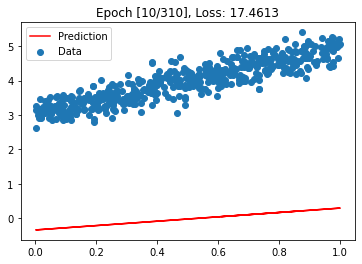

Epoch [20/310], Loss: 13.5470


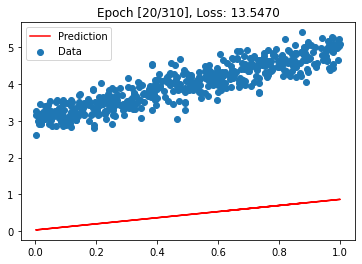

Epoch [30/310], Loss: 10.5081


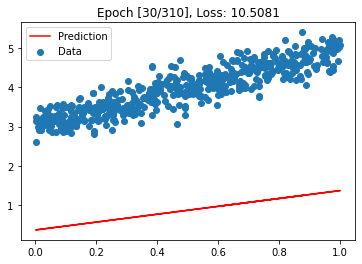

Epoch [40/310], Loss: 8.1491


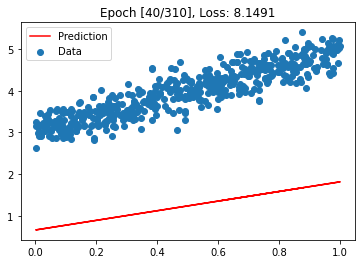

Epoch [50/310], Loss: 6.3180


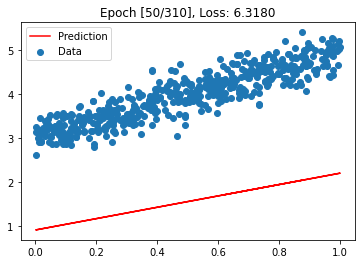

Epoch [60/310], Loss: 4.8969


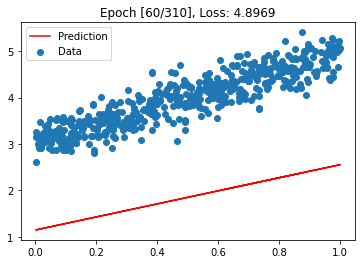

Epoch [70/310], Loss: 3.7943


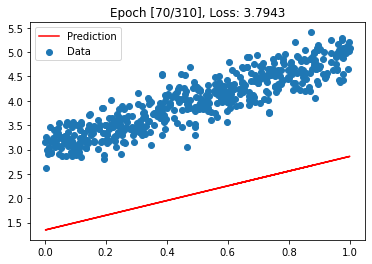

Epoch [80/310], Loss: 2.9389


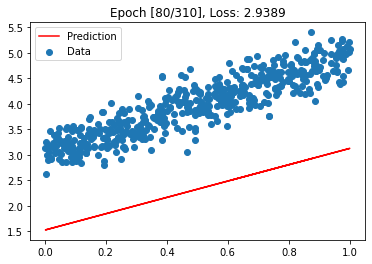

Epoch [90/310], Loss: 2.2753


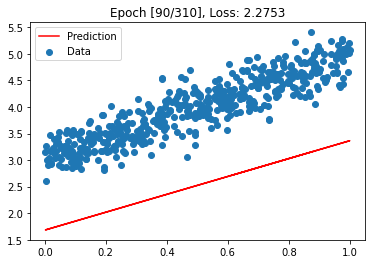

Epoch [100/310], Loss: 1.7608


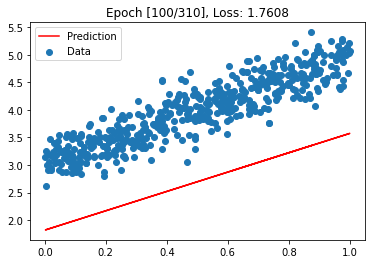

Epoch [110/310], Loss: 1.3619


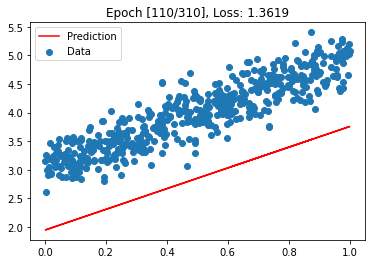

Epoch [120/310], Loss: 1.0527


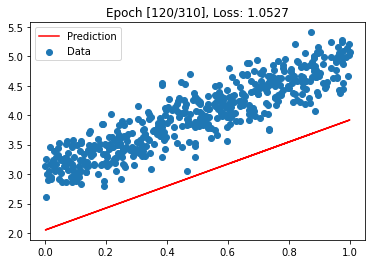

Epoch [130/310], Loss: 0.8132


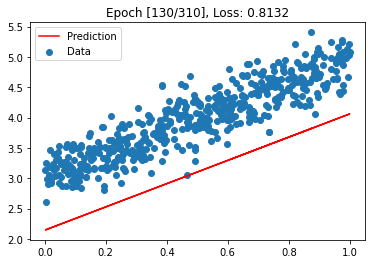

Epoch [140/310], Loss: 0.6277


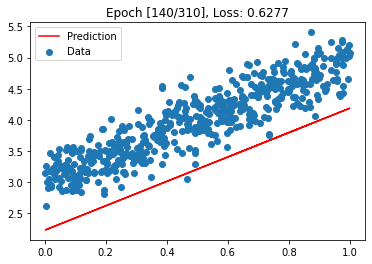

Epoch [150/310], Loss: 0.4841


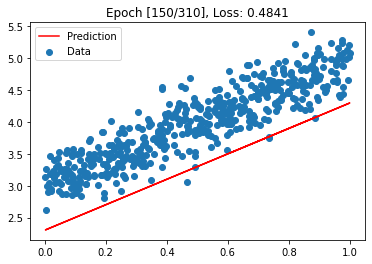

Epoch [160/310], Loss: 0.3730


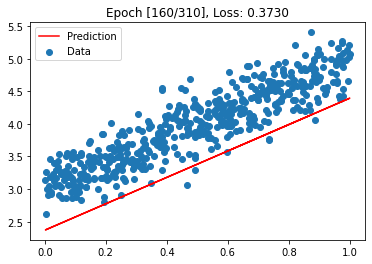

Epoch [170/310], Loss: 0.2870


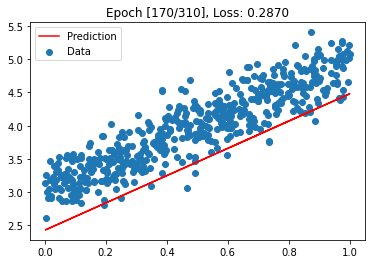

Epoch [180/310], Loss: 0.2206


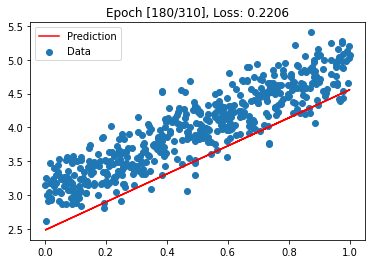

Epoch [190/310], Loss: 0.1693


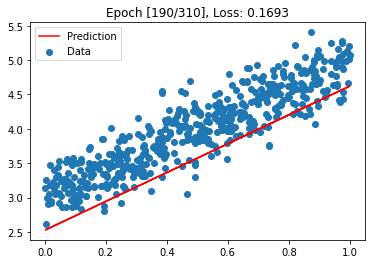

Epoch [200/310], Loss: 0.1298


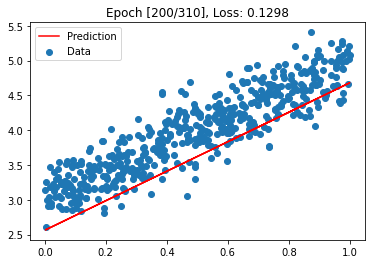

Epoch [210/310], Loss: 0.0992


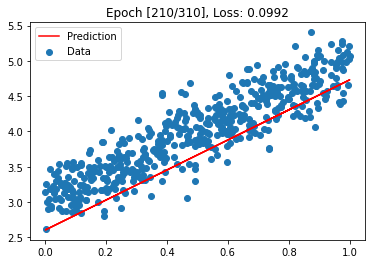

Epoch [220/310], Loss: 0.0757


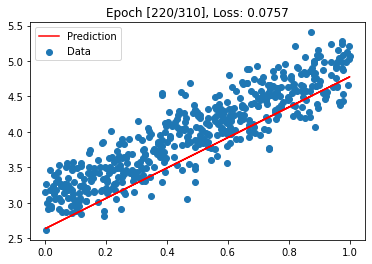

Epoch [230/310], Loss: 0.0577


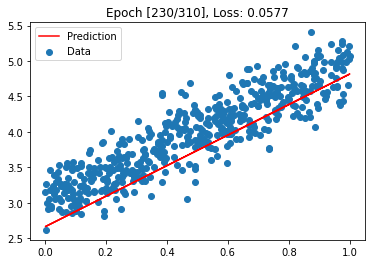

Epoch [240/310], Loss: 0.0438


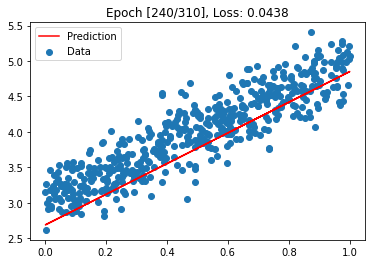

Epoch [250/310], Loss: 0.0331


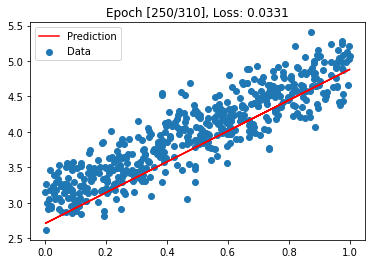

Epoch [260/310], Loss: 0.0250


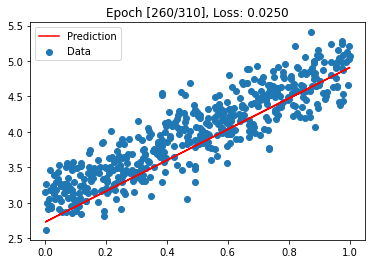

Epoch [270/310], Loss: 0.0188


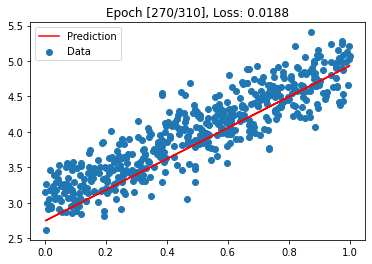

Epoch [280/310], Loss: 0.0140


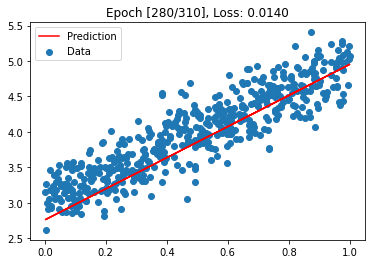

Epoch [290/310], Loss: 0.0104


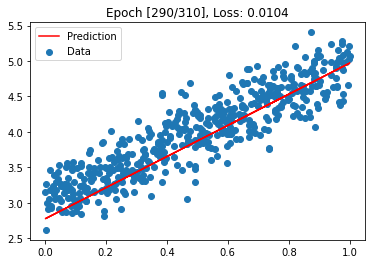

Epoch [300/310], Loss: 0.0077


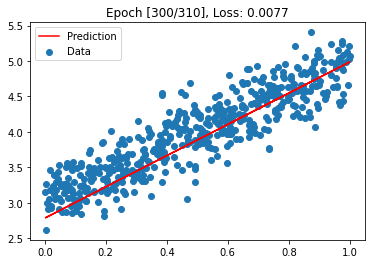

Epoch [310/310], Loss: 0.0056


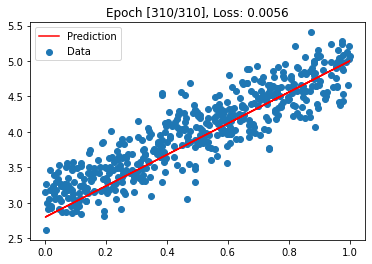

In [41]:
fit(310, model, loss_fn, opt,inputs, targets, )

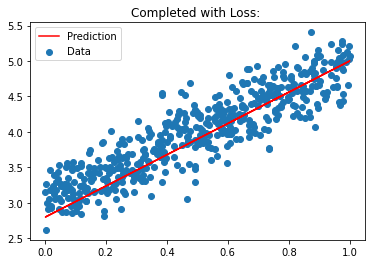

In [42]:
preds = model(inputs)
plt.scatter(inputs,targets, label="Data")
plt.plot(inputs,preds.detach().numpy(),"r-", label="Prediction")
plt.title('Completed with Loss: ')
plt.legend()
plt.show()